# Numpy
NumPy is an extension to the Python programming language, adding support for large, multidimensional (numerical) arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays.

In [1]:
import numpy as np

## 1. Create arrays
Create ndarrays from lists. note: every element must be the same type (will be converted if
possible)

In [2]:
data1 = [1, 2, 3, 4, 5] # list
arr1 = np.array(data1) # 1d array
data2 = [range(1, 5), range(5, 9)] # list of lists
arr2 = np.array(data2) # 2d array
arr2.tolist() # convert array back to list

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [3]:
np.zeros(10)
np.zeros((3, 6))
np.ones(10)
print(np.linspace(0, 1, 5)) # 0 to 1 (inclusive) with 5 points
print(np.logspace(0, 3, 4)) # 10^0 to 10^3 (inclusive) with 4 points

[0.   0.25 0.5  0.75 1.  ]
[   1.   10.  100. 1000.]


In [4]:
# arange is like range, except it returns an array (not a list)
int_array = np.arange(5)
float_array = int_array.astype(float)

## 2. Examining arrays

In [5]:
arr1.dtype # float64
arr2.dtype # int32
arr2.ndim # 2
arr2.shape # (2, 4) - axis 0 is rows, axis 1 is columns
arr2.size # 8 - total number of elements
len(arr2) # 2 - size of first dimension (aka axis)

2

## 3. Reshaping

In [6]:
arr = np.arange(10, dtype=float).reshape((2, 5))
print(arr.shape)
print(arr.reshape(5, 2))

(2, 5)
[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]


In [7]:
# Add an axis
a = np.array([0, 1])
a_col = a[:, np.newaxis]
print(a_col)
#or
a_col = a[:, None]

[[0]
 [1]]


In [8]:
# Transpose
print(a_col.T)

[[0 1]]


In [9]:
# Flatten: always returns a flat copy of the orriginal array
arr_flt = arr.flatten()
arr_flt[0] = 33
print(arr)
print(arr_flt)

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


## 4. Stack arrays

In [10]:
# Stack flat arrays in rows
a = np.array([0, 1])
b = np.array([2, 3])

ab = np.stack((a, b))
print(ab)

# or
np.vstack((a[None, :], b[None, :]))

[[0 1]
 [2 3]]


array([[0, 1],
       [2, 3]])

In [11]:
# Stack flat arrays in columns
a = np.array([0, 1])
b = np.array([2, 3])

ab = np.stack((a, b)).T
print(ab)

# or
np.hstack((a[:, None], b[:, None]))

[[0 2]
 [1 3]]


array([[0, 2],
       [1, 3]])

## 5. Selection

In [12]:
# Single item
arr = np.arange(10, dtype=float).reshape((2, 5))
print(arr)
arr[0] # 0th element (slices like a list)
arr[0, 3] # row 0, column 3: returns 4
arr[0][3] # alternative syntax

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


3.0

### 5.1 Slicing
Syntax: `start`:`stop`:`step` with `start` (default 0) `stop` (default last) `step` (default 1)

In [13]:
arr[0, :] # row 0: returns 1d array ([1, 2, 3, 4])
arr[:, 0] # column 0: returns 1d array ([1, 5])
arr[:, :2] # columns strictly before index 2 (2 first columns)
arr[:, 2:] # columns after index 2 included
arr2 = arr[:, 1:4] # columns between index 1 (included) and 4 (excluded)
print(arr2)

[[1. 2. 3.]
 [6. 7. 8.]]


In [14]:
# Row 0: reverse order
print(arr[0, ::-1])

[4. 3. 2. 1. 0.]


### 5.2 Integer or boolean array indexing

In [16]:
# Integer array indexing
print(arr)
arr2 = arr[:, [1,2,3]] # return a copy
print(arr2)
arr2[0, 0] = 44
print(arr2)

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[[1. 2. 3.]
 [6. 7. 8.]]
[[44.  2.  3.]
 [ 6.  7.  8.]]


In [17]:
# Boolean arrays indexing
print(arr)

arr2 = arr[arr > 5] # return a copy
print(arr2)

arr2[0] = 44
print(arr2)


[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[6. 7. 8. 9.]
[44.  7.  8.  9.]


In [19]:
x = np.arange(1, 20)
print(x[x < 8])

[1 2 3 4 5 6 7]


In [21]:
# left hand side value of an assignment
x[x<8] = 0 
print(x)

[ 0  0  0  0  0  0  0  8  9 10 11 12 13 14 15 16 17 18 19]


In [22]:
# Boolean arrays indexing with strings
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])
print(names == 'Bob') # returns a boolean array
print(names[names != 'Bob']) # logical selection
print((names == 'Bob') | (names == 'Will')) # keywords "and/or" don't work with boolean arrays
names[names != 'Bob'] = 'Joe' # assign based on a logical selection
print(np.unique(names)) # set function

[ True False False  True]
['Joe' 'Will']
[ True False  True  True]
['Bob' 'Joe']


## 6. Vectorized operations
Vectorization is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time.

The concept of vectorized operations on NumPy allows the use of more optimal and pre-compiled functions and mathematical operations on NumPy array objects and data sequences. The Output and Operations will speed up when compared to simple non-vectorized operations.

In [23]:
nums = np.arange(5)
nums * 10                                     # multiply each element by 10
nums = np.sqrt(nums)                          # square root of each element
np.ceil(nums)                                 # also floor, rint (round to nearest int)
np.isnan(nums)                                # checks for NaN
nums + np.arange(5)                           # add element-wise
np.maximum(nums, np.array([1, -2, 3, -4, 5])) # compare element-wise

array([1.        , 1.        , 3.        , 1.73205081, 5.        ])

In [24]:
# Compute Euclidean distance between 2 vectors
vec1 = np.random.randn(10)
vec2 = np.random.randn(10)
dist = np.sqrt(np.sum((vec1 - vec2) ** 2))

In [25]:
# math and stats
rnd = np.random.randn(4, 2) # random normals in 4x2 array
rnd.mean()
rnd.std()
rnd.argmin()                # index of minimum element
rnd.sum()
rnd.sum(axis=0)             # sum of columns
rnd.sum(axis=1)             # sum of rows

array([ 2.13877892,  0.4501692 , -1.41506456,  0.15532217])

In [26]:
# methods for boolean arrays
(rnd > 0).sum() # counts number of positive values
(rnd > 0).any() # checks if any value is True
(rnd > 0).all() # checks if all values are True

False

In [ ]:
# random numbers
np.random.seed(12234)           # Set the seed
np.random.rand(2, 3)            # 2 x 3 matrix in [0, 1]
np.random.randn(10)             # random normals (mean 0, sd 1)
np.random.randint(0, 2, 10)     # 10 randomly picked 0 or 1

## 7. Exercises

### Q1) 

Given the array:
`X = np.random.randn(4, 2)`# random normals in 4x2 array
*   For each column find the row index of the minimum value.
*   Write a function `standardize(X)` that return an array whose columns are centered and scaled (by std-dev).

**hint** To standardize a variable, use the following formula:
1.  Subtract the mean, μ, from the value you want to convert, X.
2.  Divide the result from Step 1 by the standard deviation, σ.

### Solution

In [29]:
x = np.random.randn(4, 2)
print(x)

[[-0.74097756 -0.76801278]
 [ 0.47069633  1.83192788]
 [-1.49939359 -1.9075171 ]
 [ 0.55239138 -1.0869079 ]]


In [34]:
x.argmin(axis=0)
# print the values
# print(x[x.argmin(axis=0)][0])

array([2, 2], dtype=int64)

In [37]:
# the index of the minimum value across the whole array
# np.argwhere(x == np.min(x))

In [38]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
print(x)

[[-0.50816347 -0.20392369]
 [ 0.90193378  1.65387873]
 [-1.39077749 -1.01816301]
 [ 0.99700718 -0.43179203]]


### Q2)

Convert the following array to `int` data type
`a = np.array([[2.5, 3.8, 1.5], [4.7, 2.9, 1.56]])`


### Solution

In [39]:
a = np.array([[2.5, 3.8, 1.5],
              [4.7, 2.9, 1.56]])

o = a.astype('int')

print(o)

[[2 3 1]
 [4 2 1]]


### Q3)

Create two random 2*3 arrays and stack them horizontally.

*set seed to 123*

### Solution

In [42]:
np.random.seed(123)
a = np.random.randn(2, 3)
b = np.random.randn(2, 3)
c = np.stack((a, b), axis=0)
print(a)
print()
print(b)
print()
print(c)

[[-1.0856306   0.99734545  0.2829785 ]
 [-1.50629471 -0.57860025  1.65143654]]

[[-2.42667924 -0.42891263  1.26593626]
 [-0.8667404  -0.67888615 -0.09470897]]

[[[-1.0856306   0.99734545  0.2829785 ]
  [-1.50629471 -0.57860025  1.65143654]]

 [[-2.42667924 -0.42891263  1.26593626]
  [-0.8667404  -0.67888615 -0.09470897]]]


# Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

## 1. Basic plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# inline plot (for jupyter)
%matplotlib inline

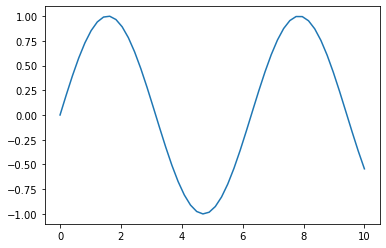

In [2]:
x = np.linspace(0, 10, 50)
sinus = np.sin(x)
plt.plot(x, sinus)
plt.show()

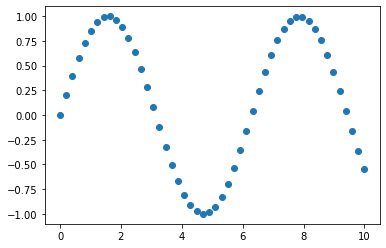

In [3]:
plt.plot(x, sinus, "o")
plt.show()

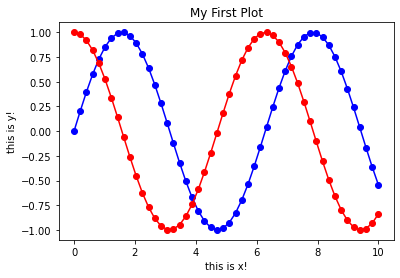

In [7]:
# fast multiplot
cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "ob", x, cosinus, "-r", x, cosinus, "or")
# or
# plt.plot(x, sinus, "-ob", x, cosinus, "-or")
plt.xlabel('this is x!')
plt.ylabel('this is y!')
plt.title('My First Plot')
plt.show()

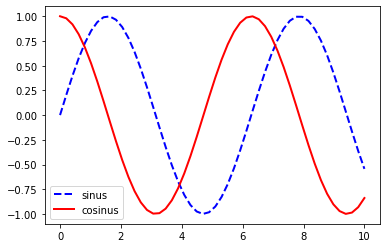

In [8]:
# Step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend()
plt.show()

## 2. Scatter (2D) plots

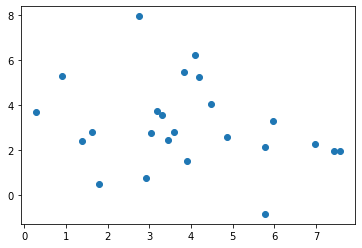

In [9]:
# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))

# plot
plt.scatter(x, y)
plt.show()

### 2.1 Scatter plots with colors

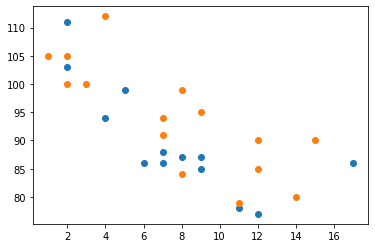

In [10]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

plt.show()

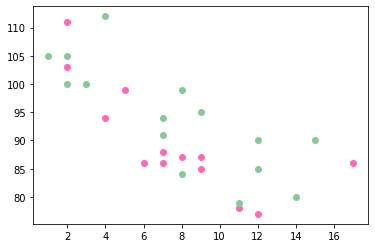

In [11]:
# You can set your own color for each scatter plot with the color or the c argument:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.show()

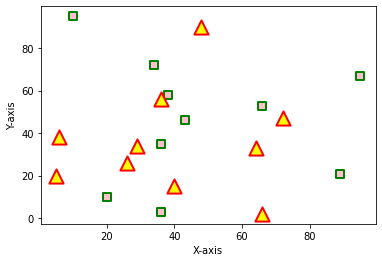

In [12]:
# Scatter plot with different shape and colour for two datasets

# dataset-1
x1 = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20]
 
y1 = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10]
 
# dataset2
x2 = [26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
 
y2 = [26, 34, 90, 33, 38, 20, 56, 2, 47, 15]
 
plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
 
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## 3. Fill between

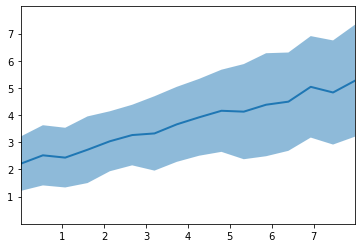

In [13]:
# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# TASK

1.  Given the array: `n_arr = np.array([[10.5, 22.5, 3.8], [41, np.nan, np.nan]])`. Remove rows in Numpy array that contains non-numeric values?
2.  Given the array: `x = np.array([1,2,3,4,5,1,2,1,1,1])`. Find the most frequent value
3.  Create random vector of size 10 and replace the maximum value by 0

# self-study

1.  Pandas
2.  seaborn